In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Activation
from tensorflow.python.framework import ops
ops.reset_default_graph()
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn import datasets
import tensorflow_hub as hub
from keras.layers import Dropout
import pandas as pd
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import math
from keras_preprocessing.image import ImageDataGenerator


In [0]:
from keras.datasets.mnist import load_data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_digits.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [0]:

train_digits = train_digits.astype('float32')
test_digits = test_digits.astype('float32')
train_digits /= 255
test_digits /= 255


In [0]:
num_classes=10

In [0]:

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [0]:
train_digits.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [0]:
train_digits=train_digits.reshape(-1,28,28,1)
test_digits=test_digits.reshape(-1,28,28,1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


W0605 03:10:10.373786 139942493149056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0605 03:10:12.304498 139942493149056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

In [0]:

from keras.optimizers import adam
optimizer = adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
results = model.fit(train_digits, train_labels, 
                    epochs=50, batch_size=64,validation_data=(test_digits,test_labels))

Instructions for updating:
Use tf.cast instead.


W0605 03:11:52.764282 139942493149056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 312us/step - loss: 0.1815 - acc: 0.9490 - val_loss: 0.0444 - val_acc: 0.9876
Epoch 2/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.0742 - acc: 0.9785 - val_loss: 0.0332 - val_acc: 0.9893
Epoch 3/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 4/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.0503 - acc: 0.9854 - val_loss: 0.0269 - val_acc: 0.9917
Epoch 5/50
60000/60000 [==============================] - 14s 227us/step - loss: 0.0444 - acc: 0.9868 - val_loss: 0.0275 - val_acc: 0.9913
Epoch 6/50
60000/60000 [==============================] - 14s 225us/step - loss: 0.0454 - acc: 0.9864 - val_loss: 0.0381 - val_acc: 0.9899
Epoch 7/50
60000/60000 [==============================] - 13s 225us/step - loss: 0.0385 - acc: 0.9889 - val_loss: 0.

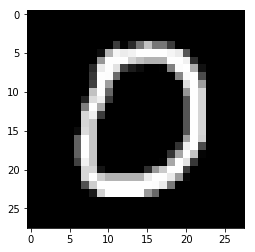

In [0]:
first_image = test_digits[10]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()